<a href="https://colab.research.google.com/github/ashishyadav0501/Project/blob/main/Twitter_Disaster_Tweet_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a50cab0e-a153-944d-68eb-ca8062b90ee5)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-14 03:39:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-14 03:39:22 (74.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from  helper_functions import unzip_data, create_tensorboard_callback, compare_historys

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-04-14 03:39:29--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   726KB/s    in 0.8s    

2023-04-14 03:39:30 (726 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Unzip the data
unzip_data("nlp_getting_started.zip")

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle our training dataframe
train_data_shuffled = train_df.sample(frac=1, random_state=42)
train_data_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# if the datasets is  imbalanced then vist - https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [ ]:
# Visualize som random training examples
import random

random_index = random.randint(0, len(train_df)-5)
for row in train_data_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _ , text, target = row
  print(f"Index: {random_index}, Target: {target}", "real disaster" if target>0 else "not real disaster")
  print(f"Text :\n{text}\n")
  print("-----\n")

Index: 1081, Target: 0 not real disaster
Text :
@rokiieee_ the game has officially collapsed

-----

Index: 1081, Target: 1 real disaster
Text :
Zotar(50 skeleton alchemist) was electrocuted to death by Atamathon the Giant Golem on Golem Graveyard 1.
http://t.co/GpwrC1KZ5i

-----

Index: 1081, Target: 1 real disaster
Text :
Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/Z2Ph0ArzYI

-----

Index: 1081, Target: 0 not real disaster
Text :
Some days I drown in my tears but I don't let it get me down

-----

Index: 1081, Target: 1 real disaster
Text :
So all the store's fire alarms went off today at work and we had to evacuate. I was like 'OMG!! I.S.I.S. ITS HAPPENING!!!!'

-----



In [ ]:
'''
random_split = random.randint(0, len(test_df))
validation_df = test_df[random_split:random_split+10]
validation_df.head()
'''

'\nrandom_split = random.randint(0, len(test_df))\nvalidation_df = test_df[random_split:random_split+10]\nvalidation_df.head()\n'

In [ ]:
train_textto_numpy = train_data_shuffled["text"].to_numpy()
train_textto_numpy[0]

'So you have a new weapon that can cause un-imaginable destruction.'

## Split data into training and validation sets


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Using train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data_shuffled["text"].to_numpy(),
                                                                            train_data_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(val_sentences) , len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences[0:10], train_labels[0:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Converting text into numbers
##### Tokenization - Direct mapping from word to token
##### Embedding - Create a matrix of feature vector for each token

 ### Text vectorization(tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None, # how many words in vocabulary
                                    standardize="lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams=None, # Create group of n words
                                    output_mode="int", # How long do you want your sequences to be?
                                    output_sequence_length=None)
                                    #pad_to_max_tokens=True)

In [ ]:
# The average number of tokens(words) in training tweets
round(sum(len(i.split()) for i in train_sentences)/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # Max number of words to have in our vocabulary
max_length = 15 # max length of our sequence,i.e, how many words from tweet our model is going to see

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
#Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer(sample_sentence)

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
         0,   0])>

In [ ]:
# Choose a random sentence and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original Tweet: {random_sentence}\
    \n\n Vectorized version: ")
text_vectorizer(random_sentence)

Original Tweet: @CyhiThePrynce bombed on Kanye in that #ElephantInTheRoom ????????    

 Vectorized version: 


<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([   1,  467,   11, 5291,    4,   16,    1,    0,    0,    0,    0,
          0,    0,    0,    0])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocabulary {len(words_in_vocab)}") #[UNK] stands for Unknown
print(f"5 most common words: {top_5_words}")
print(f"5 least common words : {bottom_5_words}")

Number of words in vocabulary 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using Embedding Layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, #set input shape
                             output_dim=128, #output shape
                             input_length=max_length #how long is each input
                             )
embedding

In [ ]:
from tensorflow.keras.layers import Embedding
emb = Embedding(input_dim=max_vocab_length, #set input shape
                             output_dim=128, #output shape
                             input_length=max_length #how long is each input
                )
emb

In [ ]:
# Embed a random sentence
random_sentence = random.choice(train_sentences)
print(f"Original Text : {random_sentence}\
      \n\n Embeded version")

# Embed the random sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text : An outbreak of Legionnaires' disease in New York has killed at least 8 people @BI_Video http://t.co/eRJ7YANjXm http://t.co/vbRPeuJANL      

 Embeded version


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03542218, -0.03462261, -0.00156737, ..., -0.00882065,
          0.01677057, -0.01685928],
        [-0.00746549, -0.02900834,  0.02002103, ..., -0.03566829,
          0.00348318,  0.02508818],
        [ 0.01978064, -0.00647718, -0.01091878, ..., -0.04225085,
         -0.01320641,  0.01165402],
        ...,
        [-0.04172343,  0.00633196, -0.04074869, ..., -0.02756672,
         -0.03472664,  0.04871697],
        [-0.0268633 ,  0.04036028,  0.03898616, ..., -0.02952192,
         -0.00646184, -0.03640039],
        [ 0.043654  ,  0.0352377 , -0.04618822, ...,  0.03545468,
          0.00328263, -0.01302272]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.03542218, -0.03462261, -0.00156737,  0.00423341, -0.02972605,
         0.03941995, -0.02872586, -0.0139688 , -0.00497795, -0.01102481,
        -0.0134839 ,  0.02857223,  0.04392047, -0.04044714,  0.0468908 ,
        -0.04037581,  0.01575306,  0.04488622,  0.03881967,  0.03356327,
        -0.0010975 ,  0.02021177,  0.04191575, -0.02392316,  0.03743449,
        -0.02877524,  0.02943693, -0.01900595, -0.01017373, -0.034552  ,
        -0.02012582,  0.01973081, -0.04078586,  0.04203817, -0.0283946 ,
        -0.04483352, -0.03835955, -0.0003785 , -0.01057373, -0.033438  ,
         0.04899334,  0.02109183,  0.0476517 ,  0.01663908,  0.00454519,
         0.01044035, -0.01362933,  0.01634299,  0.00751083, -0.03053627,
         0.00434837,  0.00848583,  0.04491508, -0.00557381,  0.01246545,
        -0.03592055,  0.00583147, -0.0432894 ,  0.03462528,  0.04747151,
        -0.01382046,  0.03590599,  0.00938787, -0.04978339, -0.02951744,
  

# Modelling a text dataset

### Model 0: Getting a baseline model
Creating a benchmark model to compare other models that will be built futher.
For baseline model, I'll be using Sklearn's Multinomial Naive Bayes using TF-IDF formula to convert our words to numbers.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), #convert words to numbers
    ("clf", MultinomialNB())  # models the text
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)

In [ ]:
baseline_preds = model_0.predict(val_sentences)
print(val_sentences[:3])
baseline_preds[:20]

['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5'
 'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday'
 'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj']


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
val_sentences[:3]

array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
       'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
       'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj'],
      dtype=object)

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
def calculate_results(y_true, y_preds):
  model_accuracy = accuracy_score(y_true, y_preds)*100
  model_precision = precision_score(y_true, y_preds)
  model_recall  = recall_score(y_true, y_preds)
  model_f1score = f1_score(y_true, y_preds, average="weighted")
  model_results = {"accuracy":model_accuracy,
                   "Precision": model_precision,
                   "Recall Score":model_recall,
                   "F1 Score": model_f1score}
  return model_results


In [ ]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'Precision': 0.8861788617886179,
 'Recall Score': 0.6264367816091954,
 'F1 Score': 0.7862189758049549}

### Model 1: A simple Dense Model

In [ ]:
# Create a tensorboard callback which will allow us to track our models
from helper_functions import create_tensorboard_callback

# Save the logs in a directory
SAVE_DIR = "model_logs"

In [ ]:
# Build model with Functional API
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1- dimensional string
x = text_vectorizer(inputs) # Converts our words into tokens
x = embedding(x) # creates an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # Lower the dimensionality of the embedding
outputs = layers.Dense(1, activation="sigmoid")(x) # Create the ooutput layer, want binary outputs so use the sigmoid activation function
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [ ]:
model_1.summary()
# Global Average pooling layer condenses model's reresentation form 15 vectors of 128 (in embeding layer) to single layer of 128 in pooling layer ---See below summary

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                       experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230414-033936
Epoch 1/5
215/215 [==============================] - 20s 69ms/step - loss: 0.6111 - accuracy: 0.6926 - val_loss: 0.5331 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4408 - accuracy: 0.8208 - val_loss: 0.4700 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3463 - accuracy: 0.8593 - val_loss: 0.4589 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2833 - accuracy: 0.8926 - val_loss: 0.4640 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2364 - accuracy: 0.9133 - val_loss: 0.4858 - val_accuracy: 0.7835


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7835


[0.48577970266342163, 0.7834645509719849]

In [ ]:
# Make some predictions and evaluate that
model_1_preds_probs = model_1.predict(val_sentences)
model_1_preds_probs[0], model_1_preds_probs.shape

24/24 [==============================] - 0s 2ms/step


(array([0.2969938], dtype=float32), (762, 1))

In [ ]:
l = tf.squeeze(model_1_preds_probs)
l.shape

TensorShape([762])

In [ ]:
# Convert model_1 predictions probabilities to label format i.e 0 or 1
model_1_preds = tf.cast(tf.squeeze(tf.round(model_1_preds_probs)), dtype =tf.float32)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels, y_preds=model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'Precision': 0.823321554770318,
 'Recall Score': 0.6695402298850575,
 'F1 Score': 0.780192419920975}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

## Making prediction on sample sentence

In [ ]:
sample_sen = "Earthquake of magnitude "
z = [sample_sen]
z

['Earthquake of magnitude ']

In [ ]:
predsenprob = model_1.predict([sample_sen])
predsenlabel = tf.squeeze(tf.round(predsenprob)).numpy()
predsenlabel

1/1 [==============================] - 0s 32ms/step


1.0

# Visualizing learned embeddings

In [ ]:
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of the embedding layer
# these are numerical representation of each token in our training data - which have been learned from 5 epochs
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (output_dim of our embedding layer)

(10000, 128)


In [ ]:
# Create enbedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network (RNN's)

Sources to study -
MIT's sequence modelling lecture -https://youtu.be/ySEx_Bqxvvo
Chris Olah's LSTM - https://colah.github.io/posts/2015-08-Understanding-LSTMs/

### Model 2 : LSTM
LSTM = long short term memory

In [ ]:
# Creating LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # when stacking RNN cells together, need to set return_sequences=True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
# Compile model_2
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_2_history = model_2.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230414-034025
Epoch 1/5
215/215 [==============================] - 17s 64ms/step - loss: 0.2265 - accuracy: 0.9250 - val_loss: 0.5958 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1570 - accuracy: 0.9416 - val_loss: 0.7343 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1271 - accuracy: 0.9540 - val_loss: 0.6859 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1064 - accuracy: 0.9599 - val_loss: 0.8553 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0848 - accuracy: 0.9664 - val_loss: 0.7908 - val_accuracy: 0.7769


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.01566515],
       [0.7295331 ],
       [0.9999521 ],
       [0.13486505],
       [0.00150503],
       [0.99959975],
       [0.93724585],
       [0.9999832 ],
       [0.99994683],
       [0.5606535 ]], dtype=float32)

In [ ]:
# Convert model_2_pred_probs to pred labels
model_2_pred= tf.squeeze(tf.round(model_2_pred_probs))
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(val_labels, model_2_pred)
model_2_results

{'accuracy': 77.69028871391076,
 'Precision': 0.8068965517241379,
 'Recall Score': 0.6724137931034483,
 'F1 Score': 0.774064384984916}

### Model 3: GRU
GRU - Gated Recurrent Unit
Structure of RNN typically looks like -

` (Input- text) - Tokenize - Embedding - Layers(RNNs/Dense) - Output`

In [ ]:
# Building RNN for GRU cell
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# print(x.shape)
# x = layers.GRU(64, return_sequences=True)(x) #Set return_sequences if you want to stack GRU layers
# x = layers.LSTM(64, return_sequences=True)(x)
# print(x.shape)
# x = layers.GRU(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation="relu")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_3_logs")])

Saving TensorBoard log files to: model_logs/model_3_logs/20230414-034054
Epoch 1/5
215/215 [==============================] - 15s 58ms/step - loss: 0.1642 - accuracy: 0.9337 - val_loss: 0.7226 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0826 - accuracy: 0.9691 - val_loss: 0.8064 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0711 - accuracy: 0.9723 - val_loss: 0.9993 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0623 - accuracy: 0.9750 - val_loss: 1.0153 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0498 - accuracy: 0.9785 - val_loss: 1.3182 - val_accuracy: 0.7703


In [ ]:
# Making predictions with GRU model
model_3_pred_proba = model_3.predict(val_sentences)
model_3_pred_proba.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [ ]:
# Converting pred probability in labels
model_3_label = tf.squeeze(tf.round(model_3_pred_proba))
model_3_label[:5], model_3_label.shape

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>,
 TensorShape([762]))

In [ ]:
# Evaluating the model
model_3_results = calculate_results(val_labels,model_3_label)
model_3_results

{'accuracy': 77.03412073490814,
 'Precision': 0.7836065573770492,
 'Recall Score': 0.6867816091954023,
 'F1 Score': 0.7684486602580174}

### Model 4: Bidirectional RNN

In [ ]:
# Build a bidirectional RNN layer
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

##### Check once

In [ ]:
model_4_bidirectional_weights = model_4.layers[3].get_weights()
print(model_4_bidirectional_weights[:2])
for layer in model_4.layers:
  print(layer.name, layer.dtype_policy)

[array([[ 0.05768481, -0.02191314,  0.02481142, ..., -0.08748719,
        -0.03974059, -0.01311705],
       [-0.04595482,  0.10340035, -0.08277932, ...,  0.07127887,
        -0.00429142,  0.07218468],
       [ 0.09684256,  0.02698445,  0.02207533, ..., -0.08038068,
         0.07868287, -0.03535011],
       ...,
       [-0.11577153, -0.06183624,  0.05782199, ..., -0.03870291,
        -0.08065754,  0.03580397],
       [-0.00554982, -0.05300364,  0.01301733, ...,  0.05108306,
         0.11711481, -0.04786178],
       [ 0.03034046, -0.04263625, -0.03090709, ...,  0.05350766,
         0.08612007,  0.08278209]], dtype=float32), array([[-0.00587595,  0.01560116,  0.03123943, ..., -0.02979661,
         0.02837755,  0.0552936 ],
       [ 0.03805555,  0.02050948,  0.07659915, ..., -0.04840483,
        -0.15097964,  0.01162691],
       [-0.02143887,  0.04460004, -0.01374042, ..., -0.05620595,
        -0.02067996, -0.09594656],
       ...,
       [ 0.02907428,  0.11587412, -0.03167658, ...,  0.035

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

In [ ]:
model_4_history = model_4.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230414-034138
Epoch 1/5
215/215 [==============================] - 18s 64ms/step - loss: 0.1135 - accuracy: 0.9612 - val_loss: 0.9353 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0538 - accuracy: 0.9768 - val_loss: 1.2061 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0475 - accuracy: 0.9785 - val_loss: 1.1992 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0411 - accuracy: 0.9813 - val_loss: 1.3280 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0393 - accuracy: 0.9810 - val_loss: 1.4642 - val_accuracy: 0.7717


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:5]

24/24 [==============================] - 1s 4ms/step


array([[2.3818756e-03],
       [7.9266280e-01],
       [9.9995875e-01],
       [1.0475153e-01],
       [2.3938639e-05]], dtype=float32)

In [ ]:
model_4_label = tf.squeeze(tf.round(model_4_pred_probs))
model_4_label[:4]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 1., 0.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(val_labels, model_4_label)
model_4_results

{'accuracy': 77.16535433070865,
 'Precision': 0.7824675324675324,
 'Recall Score': 0.6925287356321839,
 'F1 Score': 0.7699532001851459}

In [ ]:
import numpy as np
sample_sen = "Tsunami in Japan"
model_res = model_4.predict([sample_sen])
if model_res > 0.5:
  print("Disaster")
else:
  print("All well")

1/1 [==============================] - 0s 43ms/step
Disaster


### Model 5 : Conv1D
Typical Structure of Conv1D model for sequences:
``` Inputs(text) -- Tokenization -- Embedding -- Layers(typically Conv1D + pooling) -- Outputs(class_probabilities) ```

https://poloclub.github.io/cnn-explainer/

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
import tensorflow as tf
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is a sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size = 5, #each filter will look at 5 words at a time
                        strides=1, # looks at each single word
                        activation="relu",
                        padding="valid")
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv2d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# embedding_test

In [ ]:
# max_pool_output

In [ ]:
# conv_1d_output

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv_1D")

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

In [ ]:
history_model_5 = model_5.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20230414-034227
Epoch 1/5
215/215 [==============================] - 16s 65ms/step - loss: 0.1265 - accuracy: 0.9593 - val_loss: 0.9016 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0734 - accuracy: 0.9730 - val_loss: 1.0357 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0601 - accuracy: 0.9765 - val_loss: 1.1566 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0541 - accuracy: 0.9788 - val_loss: 1.1975 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0509 - accuracy: 0.9788 - val_loss: 1.2271 - val_accuracy: 0.7625


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5]

24/24 [==============================] - 0s 2ms/step


array([[2.2849578e-01],
       [8.2706648e-01],
       [9.9992621e-01],
       [5.9476335e-02],
       [9.6957919e-08]], dtype=float32)

In [ ]:
model_5_label = tf.squeeze(tf.round(model_5_pred_probs))
model_5_label[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(val_labels, model_5_label)
model_5_results

{'accuracy': 76.24671916010499,
 'Precision': 0.7684887459807074,
 'Recall Score': 0.6867816091954023,
 'F1 Score': 0.7608791530897157}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'Precision': 0.8861788617886179,
 'Recall Score': 0.6264367816091954,
 'F1 Score': 0.7862189758049549}

## Model 6: TensorFlowHub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call universal sentence encoder on a sentence, it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
# Create a keras layer using USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")


In [ ]:
from tensorflow.keras import Sequential

model_6 = Sequential([
    sentence_encoder_layer,
    # layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
history_model_6 = model_6.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230414-034357
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.6491 - accuracy: 0.7330 - val_loss: 0.6133 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.5819 - accuracy: 0.7917 - val_loss: 0.5636 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.5389 - accuracy: 0.7959 - val_loss: 0.5317 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.5100 - accuracy: 0.7981 - val_loss: 0.5107 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4898 - accuracy: 0.7996 - val_loss: 0.4961 - val_accuracy: 0.7940


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:5]

24/24 [==============================] - 1s 9ms/step


array([[0.36380562],
       [0.6725907 ],
       [0.8604714 ],
       [0.3511473 ],
       [0.64129496]], dtype=float32)

In [ ]:
model_6_pred_labels = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred_labels[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(val_labels, model_6_pred_labels)
model_6_results

{'accuracy': 79.39632545931758,
 'Precision': 0.8070739549839229,
 'Recall Score': 0.7212643678160919,
 'F1 Score': 0.7925857847242284}

### Model 7

In [ ]:
emb2 = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
sentence_encoder_layer2 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                         input_shape=[],
                                         trainable = False,
                                         dtype=tf.string,
                                         name = "USE2")

In [ ]:
from tensorflow.keras import Sequential

model_7 = Sequential([
    sentence_encoder_layer2,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output")
], name="model_7_USE")

model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE2 (KerasLayer)           (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_sentences, train_labels,
                                  epochs=5,
                                  validation_data=(val_sentences, val_labels),
                                  callbacks=[create_tensorboard_callback(SAVE_DIR,"model_7_USE")])

Saving TensorBoard log files to: model_logs/model_7_USE/20230414-034432
Epoch 1/5
215/215 [==============================] - 7s 20ms/step - loss: 0.5035 - accuracy: 0.7840 - val_loss: 0.4464 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4133 - accuracy: 0.8154 - val_loss: 0.4393 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3997 - accuracy: 0.8227 - val_loss: 0.4312 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3915 - accuracy: 0.8238 - val_loss: 0.4270 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3837 - accuracy: 0.8342 - val_loss: 0.4259 - val_accuracy: 0.8189


In [ ]:
model_7.compile(loss = "binary_cross_entropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_labels = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred_labels[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(val_labels, model_7_pred_labels)
model_7_results

{'accuracy': 81.88976377952756,
 'Precision': 0.8301886792452831,
 'Recall Score': 0.7586206896551724,
 'F1 Score': 0.817984880977007}

### Model 8: TF Hub Pretrained USE but with 10% of training data

In [ ]:
# Create 10 percent of our data
train_10_percent = train_data_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
# train_10_precent.head()
train_10_percent_sentences = train_10_percent["text"]
train_10_percent_labels = train_10_percent["target"]
val_10_percent = train_10_percent[["text","target"]].sample(frac=0.1, random_state=42)
val_10_percent_sentences = val_10_percent["text"]
val_10_percent_labels = val_10_percent["target"]

In [ ]:
val_10_percent.shape

(76, 2)

In [ ]:
# Check the number of targets in our subsets
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
train_data_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
train_10_percent_labels.value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
val_10_percent["target"].value_counts()

0    45
1    31
Name: target, dtype: int64

In [ ]:
emb3 = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
sentence_encoder_3 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                     input_shape=[],
                                     trainable=False,
                                     dtype = tf.string,
                                     name="TenPercentEncoder")

In [ ]:
# Creating a model for 10 percent data

model_8 = Sequential([
    sentence_encoder_3,
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output")
], name="model_8_10_precent_USE")

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_8.summary()

Model: "model_8_10_precent_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 TenPercentEncoder (KerasLay  (None, 512)              256797824 
 er)                                                             
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_8_history = model_8.fit(train_10_percent_sentences, train_10_percent_labels,
                              epochs=5,
                              validation_data = (val_10_percent_sentences, val_10_percent_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "TenPercent")])

Saving TensorBoard log files to: model_logs/TenPercent/20230414-034503
Epoch 1/5
24/24 [==============================] - 4s 33ms/step - loss: 0.6551 - accuracy: 0.7148 - val_loss: 0.5941 - val_accuracy: 0.7500
Epoch 2/5
24/24 [==============================] - 0s 14ms/step - loss: 0.5589 - accuracy: 0.7976 - val_loss: 0.4910 - val_accuracy: 0.8026
Epoch 3/5
24/24 [==============================] - 0s 15ms/step - loss: 0.4742 - accuracy: 0.8055 - val_loss: 0.4317 - val_accuracy: 0.8158
Epoch 4/5
24/24 [==============================] - 0s 15ms/step - loss: 0.4258 - accuracy: 0.8200 - val_loss: 0.3914 - val_accuracy: 0.8289
Epoch 5/5
24/24 [==============================] - 0s 16ms/step - loss: 0.3911 - accuracy: 0.8292 - val_loss: 0.3606 - val_accuracy: 0.8158


In [ ]:
model_8_pred_probs = model_8.predict(val_10_percent_sentences)
model_8_pred_probs[:5]

3/3 [==============================] - 0s 12ms/step


array([[0.12051384],
       [0.61293715],
       [0.8675848 ],
       [0.07327186],
       [0.66101557]], dtype=float32)

In [ ]:
model_8_pred_labels = tf.squeeze(tf.round(model_8_pred_probs))
model_8_pred_labels[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [ ]:
model_8_results = calculate_results(val_10_percent_labels, model_8_pred_labels)
model_8_results

{'accuracy': 81.57894736842105,
 'Precision': 0.7297297297297297,
 'Recall Score': 0.8709677419354839,
 'F1 Score': 0.8173374613003096}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'Precision': 0.8861788617886179,
 'Recall Score': 0.6264367816091954,
 'F1 Score': 0.7862189758049549}

### Warning - Data Leakage Check 246
In upper case there might be data leakage, this might be due the split that we are making.

### Making the correct split

In [ ]:
train_10_percent_split = int(0.1*len(train_sentences))
train_10_percent_split

685

In [ ]:
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [ ]:
emb4 = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
sentence_encoder_4 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                               input_shape=[],
                               trainable = False,
                               dtype = tf.string,
                               name = "10percentcorrectsplit")

### Building correct split model - Model 9

In [ ]:
from tensorflow.keras import Sequential

model_9 = Sequential([
    sentence_encoder_4,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_9.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_9_history = model_9.fit(train_sentences_10_percent, train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_10_percent_correct_split/20230414-034520
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6680 - accuracy: 0.7022 - val_loss: 0.6465 - val_accuracy: 0.7257
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5966 - accuracy: 0.8044 - val_loss: 0.5889 - val_accuracy: 0.7625
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5203 - accuracy: 0.8204 - val_loss: 0.5339 - val_accuracy: 0.7808
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4596 - accuracy: 0.8161 - val_loss: 0.5035 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 34ms/step - loss: 0.4188 - accuracy: 0.8307 - val_loss: 0.4897 - val_accuracy: 0.7795


In [ ]:
model_9_pred_prob = model_9.predict(val_sentences)
model_9_pred_labels = tf.squeeze(tf.round(model_9_pred_prob))
model_9_pred_labels[:5]

24/24 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [ ]:
model_9_results = calculate_results(val_labels, model_9_pred_labels)
model_9_results

{'accuracy': 77.95275590551181,
 'Precision': 0.8,
 'Recall Score': 0.6896551724137931,
 'F1 Score': 0.7774022539420016}

# Comparing Performance of each model

In [ ]:
# Combine model results in dataframe
all_model_results = pd.DataFrame({"Baseline": baseline_results,
                                 "1 Simple Dense" : model_1_results,
                                 "2 LSTM": model_2_results,
                                 "3 GRU" : model_3_results,
                                 "4 Bidirectional" : model_4_results,
                                 "5 Conv1D" : model_5_results,
                                 "6 Hub USE encoder" : model_6_results,
                                 "7 USE 10%" : model_7_results,
                                 "Model 8" : model_8_results,
                                 "Model 9" : model_9_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,Precision,Recall Score,F1 Score
Baseline,79.265092,0.886179,0.626437,0.786219
1 Simple Dense,78.346457,0.823322,0.669540,0.780192
2 LSTM,77.690289,0.806897,0.672414,0.774064
3 GRU,77.034121,0.783607,0.686782,0.768449
4 Bidirectional,77.165354,0.782468,0.692529,0.769953
5 Conv1D,76.246719,0.768489,0.686782,0.760879
6 Hub USE encoder,79.396325,0.807074,0.721264,0.792586
7 USE 10%,81.889764,0.830189,0.758621,0.817985
Model 8,81.578947,0.729730,0.870968,0.817337
Model 9,77.952756,0.800000,0.689655,0.777402


In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,Precision,Recall Score,F1 Score
Baseline,0.792651,0.886179,0.626437,0.786219
1 Simple Dense,0.783465,0.823322,0.669540,0.780192
2 LSTM,0.776903,0.806897,0.672414,0.774064
3 GRU,0.770341,0.783607,0.686782,0.768449
4 Bidirectional,0.771654,0.782468,0.692529,0.769953
5 Conv1D,0.762467,0.768489,0.686782,0.760879
6 Hub USE encoder,0.793963,0.807074,0.721264,0.792586
7 USE 10%,0.818898,0.830189,0.758621,0.817985
Model 8,0.815789,0.729730,0.870968,0.817337
Model 9,0.779528,0.800000,0.689655,0.777402


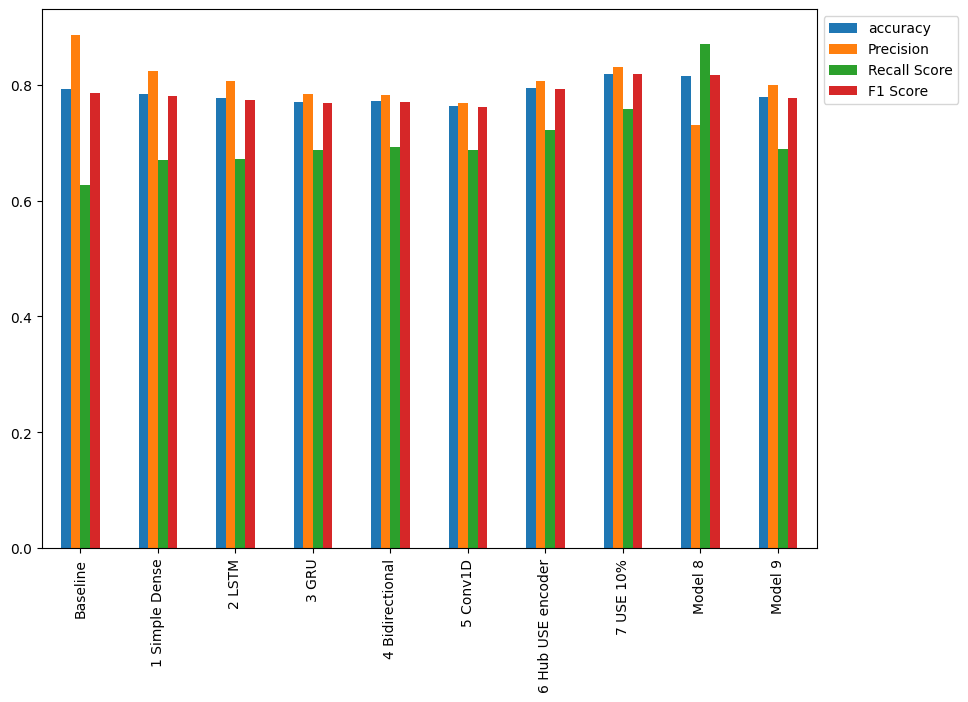

In [ ]:
# Plot and compare all model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

### Uploading model logs to tensorboard

In [ ]:
! tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Exp" \
  --description "Comparing multiple different types of model architectures on Kaggle Tweet text classification" \
  --one_shot

2023-04-14 03:53:49.283120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   BYX-YZL-NNM



New experiment created. View your TensorBoard at: https://tensorboard.dev/experi

In [ ]:
! tensorboard dev list

2023-04-14 04:01:41.482623: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/Kbh2QLtBQMqaERuZC0iASw/
	Name                 NLP Modelling Exp
	Description          Comparing multiple different types of model architectures on Kaggle Tweet text classification
	Id                   Kbh2QLtBQMqaERuZC0iASw
	Created              2023-04-14 03:55:16 (6 minutes ago)
	Updated              2023-04-14 03:55:31 (6 minutes ago)
	Runs                 18
	Tags                 5
	Scalars              270
	Tensor bytes         0
	Binary object bytes  4879209
Total: 1 experiment(s)


In [ ]:
# To delete tensorboard experiments run -
# ! tensorboard dev delete --expid Kbh2QLtBQMqaERuZC0iASw

### USING A PRETRAINED MODEL TO EVALUATE OUR DATA

In [ ]:
! wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
! unzip 08_model_6_USE_feature_extractor.zip

--2023-05-06 01:51:02--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  19.1MB/s    in 46s     

2023-05-06 01:51:49 (19.7 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [ ]:
# Import Previously trained model from Google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

In [ ]:
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred":model_6_pretrained_preds,
                       "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})

In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending = False)
most_wrong[:10]

### THE SPEED/SCORE TRADEOFF

In [ ]:
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.pref_counter()
  model.predict(samples)
  end_time = time.pref_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
model_6_pred_time, model_6_time_per_pred = pred_timer(model=model_6_predtrained, samples = val_sentences)

model_6_pred_time, model_6_time_per_pred

In [ ]:
model_6_pretrained_results = calculate_results(val_labels, model_6_pretrained_preds)
model_6_pretrained_results

In [ ]:
baseline_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_time, baseline_time_per_pred

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label = "baseline")
plt.scatter(model_6_pred_time, model_6_pretrained_results["f1"], label = "tf_hub_sentence_encoder")
plt.legend()
plt.title("F1 Score vs Time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1 Score");